## Описание

Это данные пользователей за 7 полных дней жизни (день установки считается нулевым днём).

* Retention - день жизни пользователя;
* MaxLevelPassed - максимальный пройденный м3 уровень;
* User_id - идентификатор пользователя;
* AB_Cohort - когорта теста;
* <b>SumRevenue</b> - доход от пользователя;
* <b>CountBuy</b> - количество покупок;
* CountAllStart - количество всех стартов м3 уровней;
* CountAllFinish - количество всех побед на м3 уровнях;
* CountCleanStart - количество стартов м3 уровней без использования всех видов помощи (докупки ходов, использования бонусов
и бустеров);
* CountCleanFinish - количество побед в м3 уровнях без использования всех видов помощи (докупки ходов, использования
бонусов и бустеров);
* <b>Get_Ads</b> - получение золота за просмотр рекламы;
* Get_Chapter - получение золота в награду за прохождение глав;
* Get_Buy - получение золота из покупки;
* Get_Faceb - получение золота за логин в фейсбук;
* Get_TeamL - получение золота за отправку жизней в команде;
* Get_TeamT - получение золота за прохождение туториала на команды;
* Spend_BonLives - траты золота на покупку жизней для бонусных глав;
* Spend_Bonus - траты золота на покупку бонусов;
* Spend_Boost - траты золота на покупку бустеров;
* Spend_Lives - траты золота на покупку жизней;
* Spend_Moves - траты золота на покупку ходов;
* Spend_TeamC- траты золота на создание команды.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Импортирт библиотек

In [2]:
!pip install bootstrapped

  Preparing metadata (setup.py) ... done
  Created wheel for bootstrapped: filename=bootstrapped-0.0.2-py2.py3-none-any.whl size=13930 sha256=2f53567c417cd540c11ea39fc8946cb751c5106c86d8f18236dc4c114f97115f
  Stored in directory: /root/.cache/pip/wheels/63/89/c7/09fd0b2ce6a69f0b5884df971b0de884500fe20837a8a3ab7f
Successfully built bootstrapped


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from tqdm.notebook import tqdm
import warnings
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
warnings.filterwarnings('ignore')

## Исследование данных

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/data/test task - gamedev.csv')

посмотрим все колонки

In [5]:
pd.set_option('display.max_columns', None)

посмотрим на общую информацию о данных

In [6]:
df.head()

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,46,2,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,15,3,A,0,0,18,15,14,11,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,4,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35,5,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
print(f'размер таблицы {df.shape}')

размер таблицы (25382, 22)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25382 entries, 0 to 25381
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retention         25382 non-null  int64 
 1   MaxLevelPassed    25382 non-null  int64 
 2   User_id           25382 non-null  int64 
 3   AB_Cohort         25382 non-null  object
 4   SumRevenue        25382 non-null  int64 
 5   CountBuy          25382 non-null  int64 
 6   CountAllStart     25382 non-null  int64 
 7   CountAllFinish    25382 non-null  int64 
 8   CountCleanStart   25382 non-null  int64 
 9   CountCleanFinish  25382 non-null  int64 
 10  Get_Ads           25382 non-null  int64 
 11  Get_Chapter       25382 non-null  int64 
 12  Get_Buy           25382 non-null  int64 
 13  Get_Faceb         25382 non-null  int64 
 14  Get_TeamL         25382 non-null  int64 
 15  Get_TeamT         25382 non-null  int64 
 16  Spend_BonLives    25382 non-null  int64 
 17  Spend_Bonus 

У нас один категориальный столбец, остальные количественные

In [9]:
print(f"Всего дубликатов в таблице {df.duplicated().sum()}")

Всего дубликатов в таблице 0


In [10]:
df.describe()

,Retention,MaxLevelPassed,User_id,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
count,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000,25382.000000
mean,2.386219,39.703333,2064.276416,1.317548,0.006895,18.068277,5.402490,16.349775,4.485068,9.751005,27.114491,24.741943,51.690174,2.039634,8.312978,0.039398,20.577575,2.694823,9.337326,319.953510,0.145773
std,2.372097,27.792685,1158.629383,35.967691,0.145834,24.925548,8.159008,23.459249,6.934723,29.995880,93.793796,511.293483,317.352237,11.656315,27.622639,6.276783,221.838894,73.468143,125.347640,914.724713,3.917215
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,1120.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,36.000000,1982.000000,0.000000,0.000000,9.000000,2.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,55.000000,2968.000000,0.000000,0.000000,23.000000,7.000000,21.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,365.000000,4348.000000,2508.000000,10.000000,382.000000,106.000000,368.000000,103.000000,200.000000,880.000000,26500.000000,2000.000000,310.000000,200.000000,1000.000000,9600.000000,3800.000000,5000.000000,29390.000000,200.000000


Что можно отметить:
* максимальное количество уровней : 365
* максимальный доход : 2508
* максимальное количество покупок : 10
* максимальное количество золота за просмотр рекламы : 200
* в среднем максимальный пройденный уровень : 39
* в среднем доход от пользователя : 1,3$
* среднее количество стартов всех уровней : 18
* среднее количество золота от просмотра рекламы : 9,7
* средняя трата золота на покупку ходов : 320

как минимум половина пользователей не платит, играя в игру

In [11]:
df['SumRevenue'].sum()

33442

<Axes: xlabel='SumRevenue', ylabel='Count'>

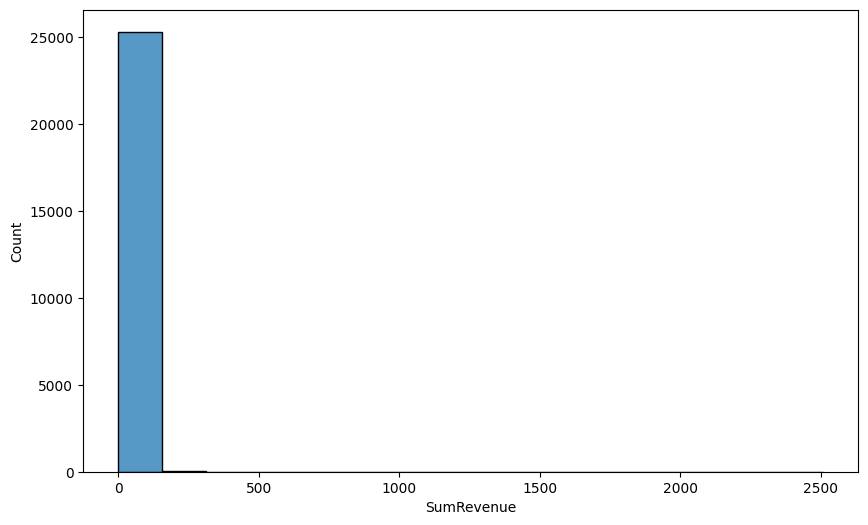

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="SumRevenue")

посмотрим на распределение платежей

In [13]:
df['SumRevenue'].value_counts().sort_index()

0       25285
53         22
76          3
92          1
103         2
106         3
113         3
119         2
123         1
159         3
166         1
182         1
189         1
199         3
202         1
207         1
212         4
238         1
245         1
250         2
258         1
264         5
265         1
272         1
274         2
279         1
294         1
296         1
299         1
317         2
318         2
382         2
388         1
394         1
399         1
423         1
491         1
498         1
543         1
582         1
598         1
618         1
682         1
716         1
741         1
1011        1
1198        1
1418        1
1858        2
1896        1
2196        1
2508        1
Name: SumRevenue, dtype: int64

посмотрим на зависимость признаков между собой

<Axes: >

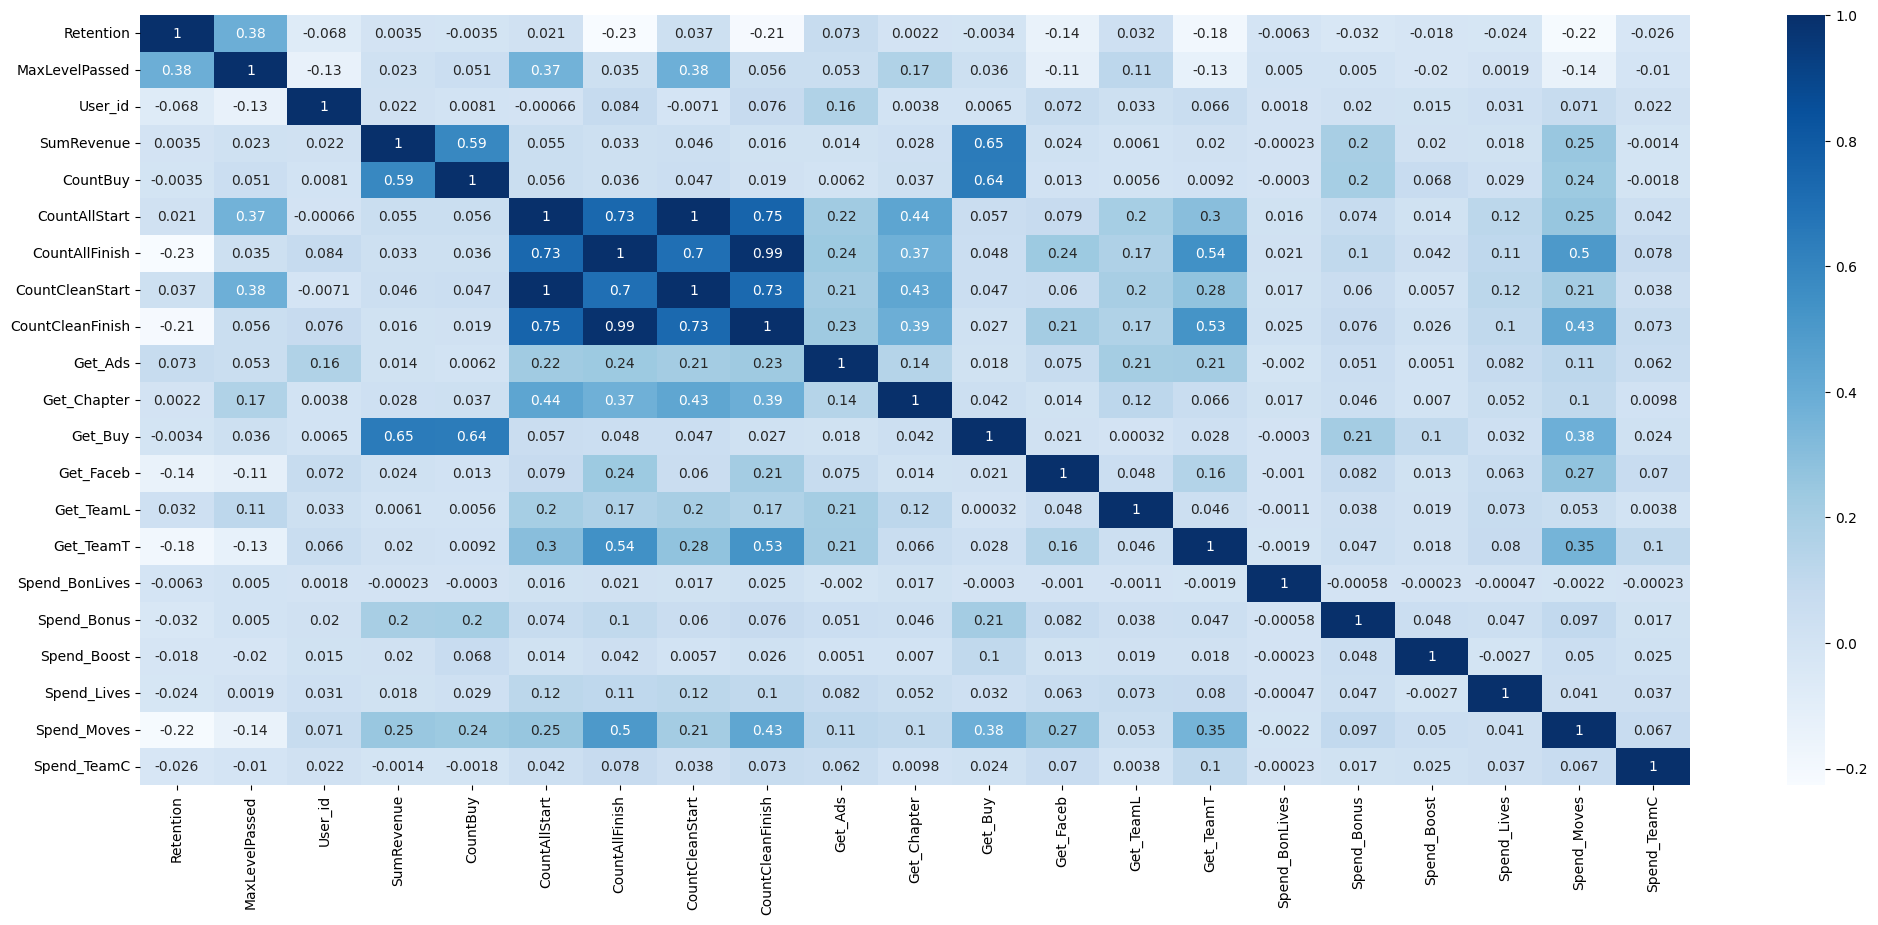

In [14]:
plt.figure(figsize=(25,10))
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Существуют некоторые интересные зависимости:
* Get_Buy и SumRevenue - 65%
* SumRevenu и CountBuy - 59%
* Get_Buy и CountBuy - 64%
* CountAllStart и CountAllFinish - 73%
* CountAllStart и CountCleanFinish - 75%
* CountAllFinish и CountCleanStart - 0,7%
* CountAllFinish и CountCleanFinish - 99%
<br>
<br> Зависимости в большинстве своем вполне закономерны: получение золота из покупки коррелирует с доходом от пользователя и количеством покупок. Количество стартов в уронвях зависит от количества побед и количества побед без использования помощи. Количество чистых стартов зависит от количества чистых финишей. И количество чистых финишей сильно связано с количеством общих финишей. В остальном зависимость либо слабая либо не линейная

посмотрим несколько примеров пользователей

In [15]:
df[df['User_id'] == 1]

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,0,46,1,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12684,0,39,1,B,0,0,72,38,63,30,0,170,0,2000,0,100,0,0,0,0,1980,0
12685,1,45,1,B,0,0,25,6,24,6,100,0,0,0,0,0,0,0,0,0,0,0
12686,3,47,1,B,0,0,9,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0
12687,4,53,1,B,123,1,24,6,20,2,100,0,10000,0,0,0,0,0,0,0,6170,0
12688,6,55,1,B,0,0,10,2,5,0,0,0,0,0,0,0,0,0,0,0,4570,0
12689,7,55,1,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df[df['User_id'] == 2]

,Retention,MaxLevelPassed,User_id,AB_Cohort,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
1,0,46,2,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12690,0,39,2,B,0,0,90,39,79,32,100,340,0,0,0,100,0,900,0,0,990,0
12691,1,43,2,B,0,0,35,4,31,3,100,0,0,0,0,0,0,0,0,0,0,0
12692,2,45,2,B,0,0,8,2,8,2,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df['AB_Cohort'].value_counts()

B    12698
A    12684
Name: AB_Cohort, dtype: int64

А/Б тестирование проведено равномерно. Почти то же самое количество пользователей попало в 2 когорты

In [18]:
df.groupby('AB_Cohort')['User_id'].agg(['count', 'nunique'])

,count,nunique
AB_Cohort,,
A,12684,4348
B,12698,4341


Сформируем таблицу, в которой посчитаем количество дней в игре на каждого пользователя и сумму в остальных метриках, в зависимости от когорты.

In [19]:
agr = {'Retention':'count', 'MaxLevelPassed': 'sum','SumRevenue': 'sum',
       'CountBuy': 'sum', 'CountAllStart': 'sum', 'CountAllFinish': 'sum', 'CountCleanStart': 'sum',
       'CountCleanFinish': 'sum', 'Get_Ads': 'sum', 'Get_Chapter': 'sum', 'Get_Buy': 'sum', 'Get_Faceb': 'sum',
       'Get_TeamL': 'sum', 'Get_TeamT': 'sum', 'Spend_BonLives': 'sum', 'Spend_Bonus': 'sum',
       'Spend_Boost': 'sum', 'Spend_Lives': 'sum', 'Spend_Moves': 'sum', 'Spend_TeamC': 'sum'}

grp = ['Retention', 'MaxLevelPassed', 'SumRevenue',
        'CountBuy', 'CountAllStart', 'CountAllFinish', 'CountCleanStart',
        'CountCleanFinish', 'Get_Ads', 'Get_Chapter', 'Get_Buy', 'Get_Faceb',
        'Get_TeamL', 'Get_TeamT', 'Spend_BonLives', 'Spend_Bonus',
        'Spend_Boost', 'Spend_Lives', 'Spend_Moves', 'Spend_TeamC']

In [20]:
df_group = df.groupby(['User_id', 'AB_Cohort'])[grp].agg(agr).reset_index()

df_group

,User_id,AB_Cohort,Retention,MaxLevelPassed,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,1,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,B,6,294,123,1,140,54,120,39,200,170,10000,2000,0,100,0,0,0,0,12720,0
2,2,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,B,3,127,0,0,133,45,118,37,200,340,0,0,0,100,0,900,0,0,990,0
4,3,A,1,15,0,0,18,15,14,11,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,4344,A,1,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8685,4345,A,1,9,0,0,9,9,7,7,0,0,0,0,0,0,0,0,0,0,0,0
8686,4346,A,1,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8687,4347,A,2,115,0,0,216,91,194,75,100,950,0,2000,0,100,0,0,0,0,5940,0


In [21]:
df_group_sum = df_group.groupby('AB_Cohort')[grp].agg('sum').reset_index()
df_group_sum

,AB_Cohort,Retention,MaxLevelPassed,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,A,12684,471420,8134,69,187759,62586,167600,51653,115700,301620,273150,640000,31130,103200,1000,241600,26600,198000,3828410,2100
1,B,12698,536330,25308,106,270850,74540,247390,62187,131800,386600,354850,672000,20640,107800,0,280700,41800,39000,4292650,1600


In [22]:
lst = []
for i in grp:
    if df_group_sum.loc[1][i] == 0:
        print(f'В показетеле {i} Было {max(df_group_sum.loc[0][i] , df_group_sum.loc[1][i])}, стало 0')
        lst.append(max(df_group_sum.loc[0][i] , df_group_sum.loc[1][i]))
    elif df_group_sum.loc[0][i] > df_group_sum.loc[1][i]:
        print(f'Меньше. В показателе {i} изменения в %', round(df_group_sum.loc[0][i] / df_group_sum.loc[1][i] * 100)-100)
        lst.append(round(df_group_sum.loc[0][i] / df_group_sum.loc[1][i] * 100)-100)
    else:
        print(f'Больше. В показателе {i} изменения в %', round(df_group_sum.loc[1][i] / df_group_sum.loc[0][i] * 100)-100)
        lst.append(round(df_group_sum.loc[1][i] / df_group_sum.loc[0][i] * 100)-100)

Больше. В показателе Retention изменения в % 0
Больше. В показателе MaxLevelPassed изменения в % 14
Больше. В показателе SumRevenue изменения в % 211
Больше. В показателе CountBuy изменения в % 54
Больше. В показателе CountAllStart изменения в % 44
Больше. В показателе CountAllFinish изменения в % 19
Больше. В показателе CountCleanStart изменения в % 48
Больше. В показателе CountCleanFinish изменения в % 20
Больше. В показателе Get_Ads изменения в % 14
Больше. В показателе Get_Chapter изменения в % 28
Больше. В показателе Get_Buy изменения в % 30
Больше. В показателе Get_Faceb изменения в % 5
Меньше. В показателе Get_TeamL изменения в % 51
Больше. В показателе Get_TeamT изменения в % 4
В показетеле Spend_BonLives Было 1000, стало 0
Больше. В показателе Spend_Bonus изменения в % 16
Больше. В показателе Spend_Boost изменения в % 57
Меньше. В показателе Spend_Lives изменения в % 408
Больше. В показателе Spend_Moves изменения в % 12
Меньше. В показателе Spend_TeamC изменения в % 31


построим графики и наглядно убедимся в изненениях

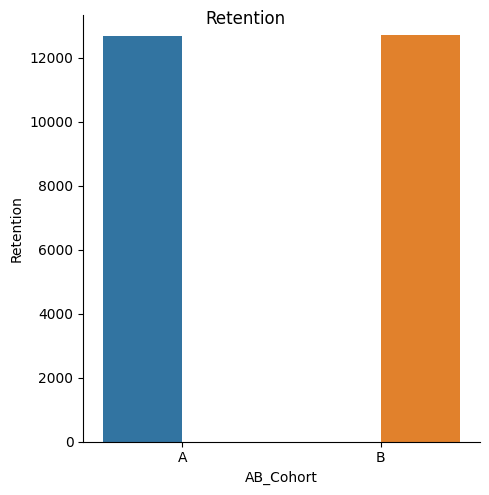

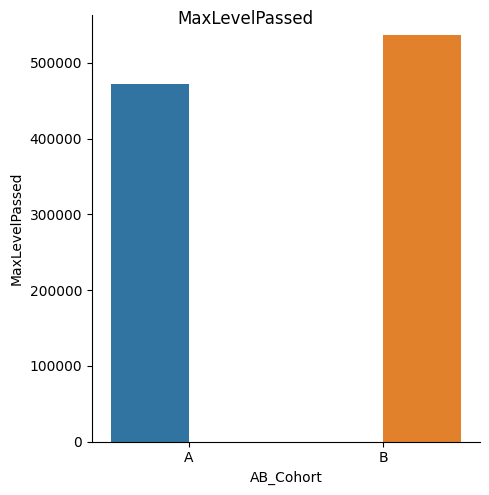

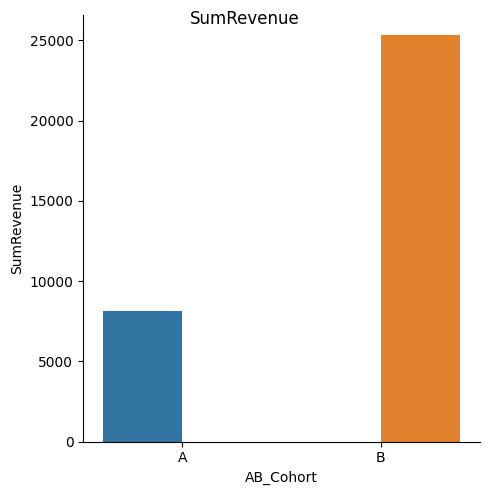

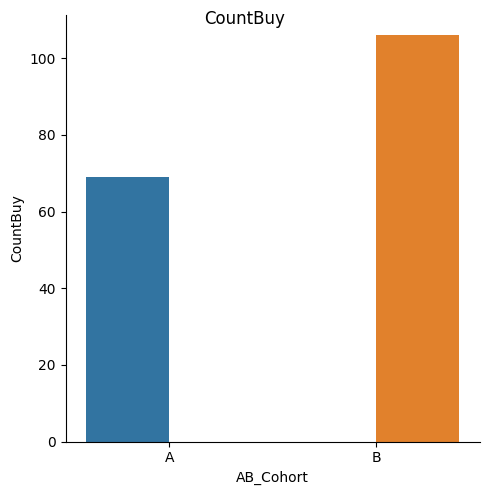

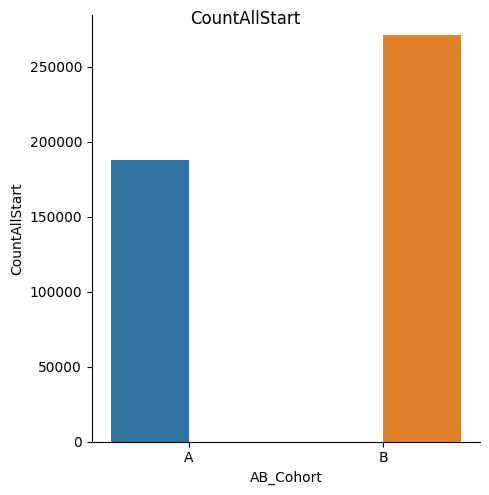

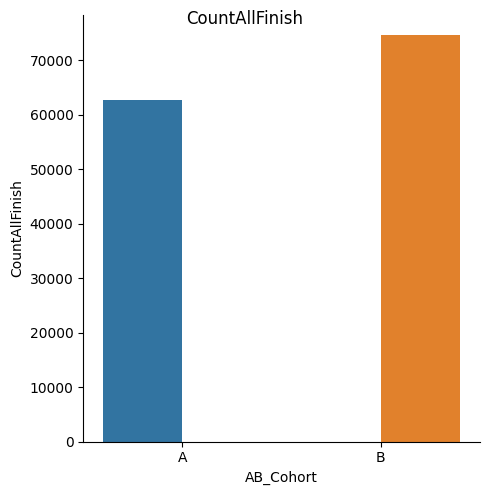

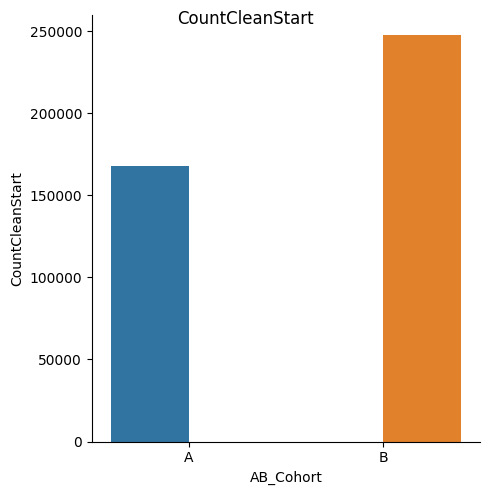

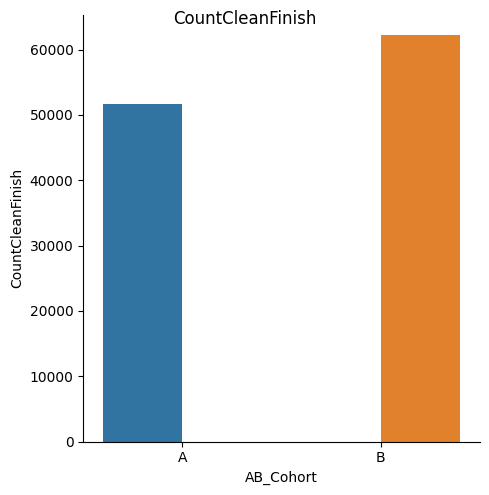

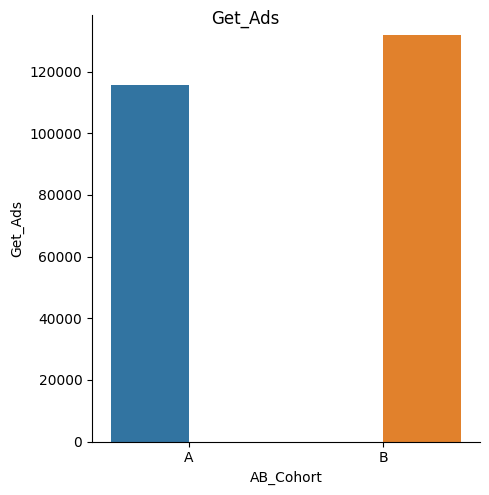

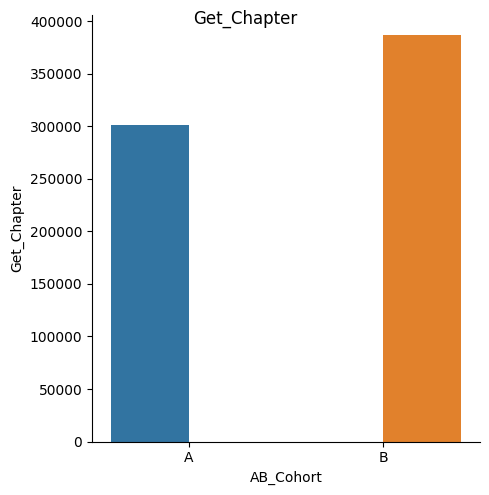

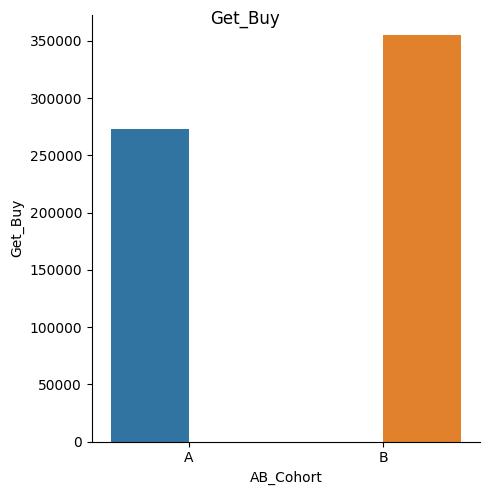

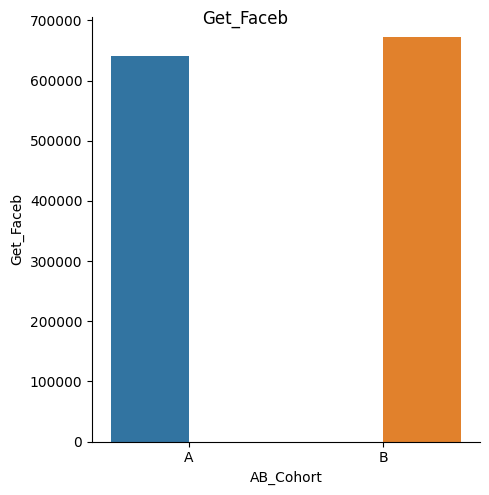

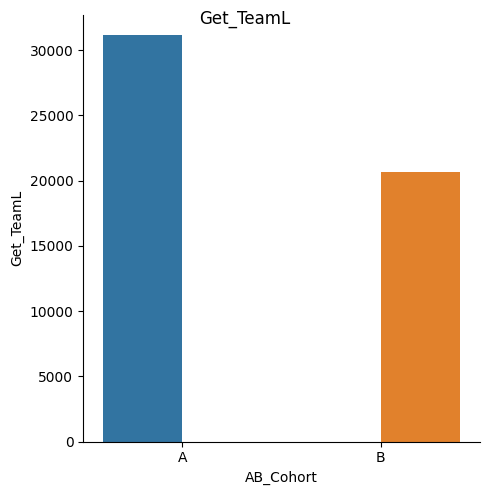

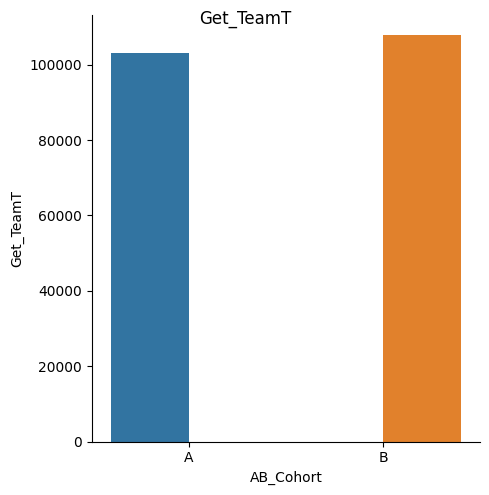

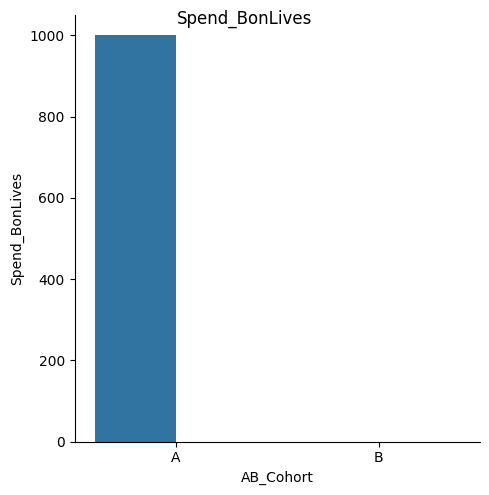

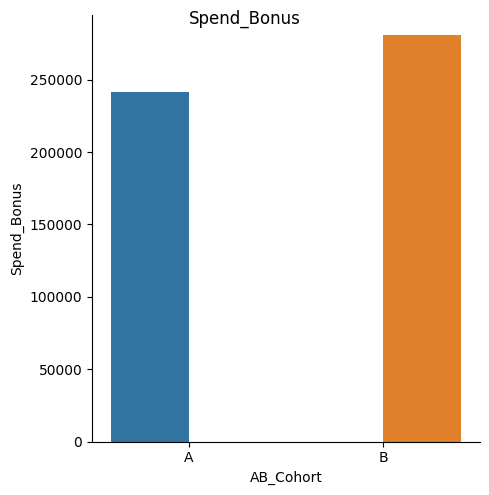

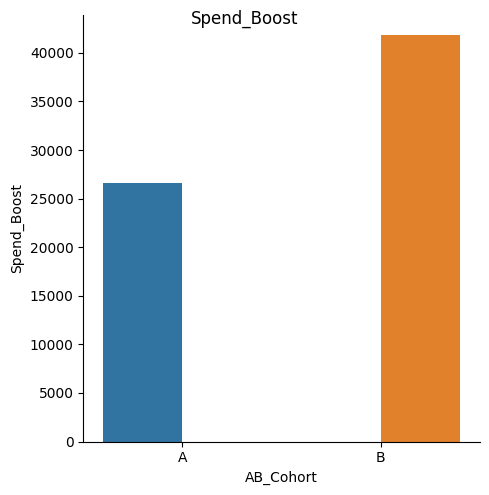

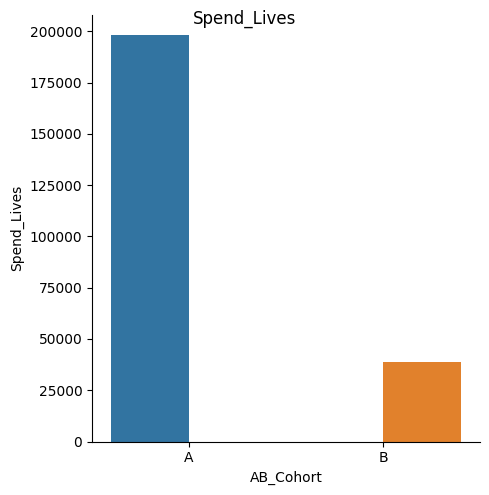

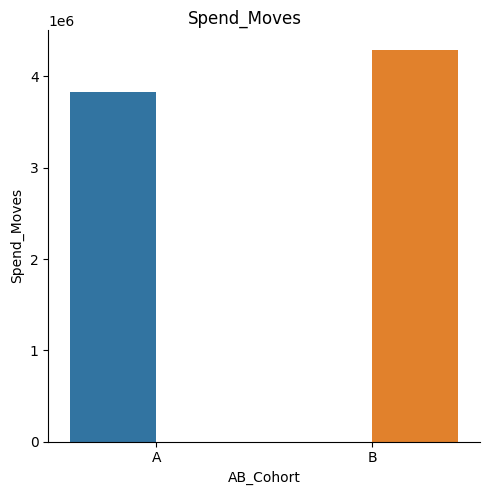

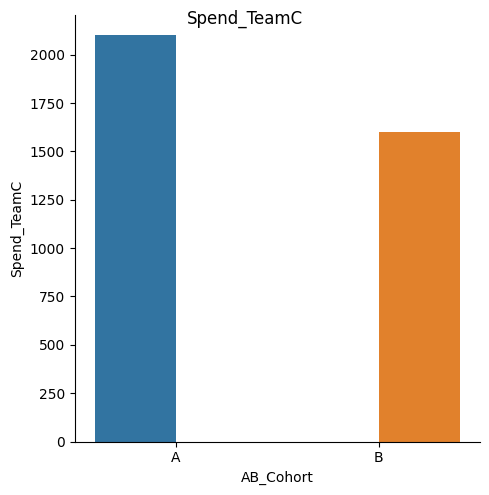

In [23]:
for i in grp:
    rp = sns.catplot(x='AB_Cohort', y=i, hue='AB_Cohort', data=df_group_sum, kind='bar')
    rp.fig.suptitle(i)

Из наглядных выводов очевидно, что когорта "B" показала намного более интересные показатели. Из самых ярких изменений:
* Очень вырос доход, на 211%. Показатель просто ошеломляющий.
* Из-за роста дохода, выросло и количество покупок на 54% (мы видели связь в корреляционной таблице).
* Закономерно вырос и показатель получения золота из покупки на 30%.
* Люди стали больше смотреть рекламы (на 14%) для того чтобы получить золото.

Изменения затронули не только увеличение метрик, но и уменьшение:
* Уменьшилось на 31% количество трат золота на создание команды.
* Уменьшился показатель получения золота за отправку жизней в команде.
* Уменьшились на 408% траты золота на покупку жизней.
* В показателе "траты золота на покупку жизней для бонусных глав" был показатель 1000 , а стало 0

## Проверка гипотез

На вид все выглядит хорошо. Но мы не будем верить глазам, а проверим с помощью статистики на самом ли деле изменения не произошли случайно и если, к примеру, изменения уменьшения времени восстановления одной жизни в 10 раз с 30 минут до 3 минут оставить, то все анализируемые показатели продолжат изменяться.

### T-критерий Стьюдента

В качестве примера исследуем показатель **SumRevenue**.


Построим гипотезу доказывающую или отвергающую утверждение **"Доход от пользователя в когорте А и когорте Б одинаковый"**.
<br>За нулевую гипотезу примем то, что они одинаковые, а за альтернативную, то что они разные.  

In [24]:
df_group.head(4)

,User_id,AB_Cohort,Retention,MaxLevelPassed,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,1,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,B,6,294,123,1,140,54,120,39,200,170,10000,2000,0,100,0,0,0,0,12720,0
2,2,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,B,3,127,0,0,133,45,118,37,200,340,0,0,0,100,0,900,0,0,990,0


In [25]:
cohort_A = df_group[df_group['AB_Cohort'] == 'A']
cohort_B = df_group[df_group['AB_Cohort'] == 'B']

In [26]:
print('Средний доход на пользователя в когорте A: ', cohort_A['SumRevenue'].mean())
print('Средний доход на пользователя в когорте B: ', cohort_B['SumRevenue'].mean())

Средний доход на пользователя в когорте A:  1.8707451701931923
Средний доход на пользователя в когорте B:  5.829993089149966


средние показатели указывают на то, что различие весьма заметно

Для проверки нашей гипотезы, мы будем использовать t-критерий Стьюдента.

In [27]:
sample_1 = cohort_A['SumRevenue']
sample_2 = cohort_B['SumRevenue']

alpha = .05

results = st.ttest_ind(
    sample_1.dropna(),
    sample_2.dropna(),
    equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Различие в показателе SumRevenue статистически значимо")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 0.027011030244035658
Отвергаем нулевую гипотезу. Различие в показателе SumRevenue статистически значимо


Наши видимые наблюдения оказались верны. Действиетльно изменения касательно уменьшения времени восстановления одной жизни в 10 раз с 30 минут до 3 минут, привело к заметному увеличению дохода на пользователя.

Сделаем то же самое для других метрик

In [28]:
metrics = ['MaxLevelPassed', 'CountBuy', 'CountAllStart', 'CountAllFinish', 'CountCleanStart',
        'CountCleanFinish', 'Get_Ads', 'Get_Chapter', 'Get_Buy', 'Get_Faceb',
        'Get_TeamL', 'Get_TeamT', 'Spend_BonLives', 'Spend_Bonus',
        'Spend_Boost', 'Spend_Lives', 'Spend_Moves', 'Spend_TeamC']

In [29]:
for i in metrics:
    print()
    print(f'Гипотеза: "Средние показатели в метрике {i} в когорте А и когорте Б одинаковы"')
    sample_1 = cohort_A[i]
    sample_2 = cohort_B[i]

    alpha = .05

    results = st.ttest_ind(
        sample_1.dropna(),
        sample_2.dropna(),
        equal_var=True)

    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print(f"Отвергаем нулевую гипотезу. Различие в показателе {i} статистически значимо")
    else:
        print(f"Не получилось отвергнуть нулевую гипотезу. Изменения в показателе {i} не статистически значимы")



Гипотеза: "Средние показатели в метрике MaxLevelPassed в когорте А и когорте Б одинаковы"
p-значение: 2.8644090485221413e-05
Отвергаем нулевую гипотезу. Различие в показателе MaxLevelPassed статистически значимо

Гипотеза: "Средние показатели в метрике CountBuy в когорте А и когорте Б одинаковы"
p-значение: 0.35846737107650484
Не получилось отвергнуть нулевую гипотезу. Изменения в показателе CountBuy не статистически значимы

Гипотеза: "Средние показатели в метрике CountAllStart в когорте А и когорте Б одинаковы"
p-значение: 8.243601349900022e-22
Отвергаем нулевую гипотезу. Различие в показателе CountAllStart статистически значимо

Гипотеза: "Средние показатели в метрике CountAllFinish в когорте А и когорте Б одинаковы"
p-значение: 1.7480726291715876e-09
Отвергаем нулевую гипотезу. Различие в показателе CountAllFinish статистически значимо

Гипотеза: "Средние показатели в метрике CountCleanStart в когорте А и когорте Б одинаковы"
p-значение: 1.408139416984966e-22
Отвергаем нулевую гип

### Бутстрап


С помощью визуальных наблюдений и теста Стьюдента мы определили какие изменения статистически значимы, а какие нет. Одним из определяющих критериев успеха, по моему мнению, является доход. Еще раз проверим, является ли увеличение дохода закономерным, используя подход "bootstrap" (формирования большого количества случайных выборок из существующих).

In [30]:
df_group.head(4)

,User_id,AB_Cohort,Retention,MaxLevelPassed,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,1,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,B,6,294,123,1,140,54,120,39,200,170,10000,2000,0,100,0,0,0,0,12720,0
2,2,A,1,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,B,3,127,0,0,133,45,118,37,200,340,0,0,0,100,0,900,0,0,990,0


сформируем тестовую и контрольную выборки

In [31]:
test = cohort_B['SumRevenue'].dropna().values
ctrl = cohort_A['SumRevenue'].dropna().values

отпределяющим критерием зафиксируем сравнение средних

In [32]:
boot_results = bs.bootstrap_ab(test = test, ctrl = ctrl,
                               stat_func= bs_stats.mean,
                               compare_func= bs_compare.difference,
                               return_distribution = True)

Определим 95% доверительный интервал

In [33]:
borders = np.percentile(boot_results, [2.5 , 97.5])
borders

array([0.69622418, 7.80019597])

визуализируем результат

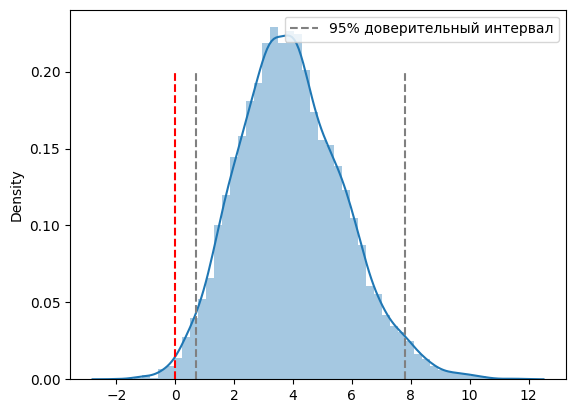

In [34]:
sns.distplot(boot_results)
plt.rcParams['figure.figsize'] = (12, 6)
plt.vlines(0, ymin =0 , ymax = 0.2, linestyles = "--", colors = 'red')
plt.vlines(borders, ymin = 0, ymax = 0.2, linestyles = "--", colors = 'grey', label='95% доверительный интервал')
plt.legend()
plt.show()

Как мы видим, 0 не входит в доверительный интервал 95%. Это значит, что на самом деле существует статистически значивая разница в среднем доходе на клиента в контрольной и тестовой выборках. Еще один метод показал, что увеличение дохода это не случайный показатель, а закономерный.
<br>
Уменьшение времени восстановления одной жизни в 10 раз с 30 минут до 3 минут, **действиетельно привело к увеличению дохода**

## Выводы

In [35]:
df_group_sum

,AB_Cohort,Retention,MaxLevelPassed,SumRevenue,CountBuy,CountAllStart,CountAllFinish,CountCleanStart,CountCleanFinish,Get_Ads,Get_Chapter,Get_Buy,Get_Faceb,Get_TeamL,Get_TeamT,Spend_BonLives,Spend_Bonus,Spend_Boost,Spend_Lives,Spend_Moves,Spend_TeamC
0,A,12684,471420,8134,69,187759,62586,167600,51653,115700,301620,273150,640000,31130,103200,1000,241600,26600,198000,3828410,2100
1,B,12698,536330,25308,106,270850,74540,247390,62187,131800,386600,354850,672000,20640,107800,0,280700,41800,39000,4292650,1600


In [36]:
dc = {
    "Показатели": ['MaxLevelPassed', 'SumRevenue', 'CountBuy',
       'CountAllStart', 'CountAllFinish', 'CountCleanStart',
       'CountCleanFinish', 'Get_Ads', 'Get_Chapter', 'Get_Buy', 'Get_Faceb',
       'Get_TeamL', 'Get_TeamT', 'Spend_BonLives', 'Spend_Bonus',
       'Spend_Boost', 'Spend_Lives', 'Spend_Moves', 'Spend_TeamC'],
    "A": list(df_group_sum.loc[0][2:]),
    "B": list(df_group_sum.loc[1][2:]),
    "Изменение %": lst[1:],
    "Различие": ['статистически значимо', 'статистически значимо', 'не статистически значимо',
                'статистически значимо', 'статистически значимо', 'статистически значимо',
                'статистически значимо', 'не статистически значимо', 'статистически значимо',
                'не статистически значимо', 'не статистически значимо','статистически значимо',
                'не статистически значимо', 'не статистически значимо', 'не статистически значимо',
                'не статистически значимо', 'статистически значимо', 'статистически значимо',
                'не статистически значимо']

}

data = pd.DataFrame(dc)
data

,Показатели,A,B,Изменение %,Различие
0,MaxLevelPassed,471420,536330,14,статистически значимо
1,SumRevenue,8134,25308,211,статистически значимо
2,CountBuy,69,106,54,не статистически значимо
3,CountAllStart,187759,270850,44,статистически значимо
4,CountAllFinish,62586,74540,19,статистически значимо
5,CountCleanStart,167600,247390,48,статистически значимо
6,CountCleanFinish,51653,62187,20,статистически значимо
7,Get_Ads,115700,131800,14,не статистически значимо
8,Get_Chapter,301620,386600,28,статистически значимо
9,Get_Buy,273150,354850,30,не статистически значимо


В результате проведенной работы, были исследованы предоставленные данные и проведено статистическое тестирование методоми T-критерий Стьюдента и bootstrap.
<br>
Исследование показало, что изменению подверглось абсолютное большинство метрик.
<br>
Наибольшим статистически значимым изменениям подверглись следующие метрики:
* SumRevenue - 211%
* CountAllStart - 44%
* CountCleanStart - 48%
* Get_TeamL - 51% (в меньшую сторону)
* Spend_Lives - 408% (в меньшую сторону)


Возможные нововведения:
* большая часть пользователей в предоставленной выборке не являются плательщиками. Одной из теорий может быть то, что для них слишком велик минимальный платеж. Возможно, если этим пользователем предоставить возможность **выиграть** один из товаров в магазине за, скажем, 0,5$ , а далее сделать что-то вроде крутящегося барабана в "колесе удачи", то плательщиков станет больше.
* применить алгоритм кластеризации машинного обучения и на старте понимать 1) будет ли пользователь платить или нет 2) если будет платить, то к какой категории плательщиков его отнести (мало, нормально, много). В зависимости от категории плательщика корректировать цены в магазине.
* Ввести дополнительные поощрения для пользователей без денег, если приведут нового пользователя.